# Multi-Dimensional Linear Regression 
# Analysis

The [dataset](https://github.com/ageron/handson-ml/tree/master/datasets/housing) used for this excercise in Multi-Dimensional Linear Regression is a modified version of the California Housing dataset available from [Luís Torgo's page](http://www.dcc.fc.up.pt/%7Eltorgo/Regression/cal_housing.html) (University of Porto). Luís Torgo obtained it from the StatLib repository (which is closed now). The dataset may also be downloaded from StatLib mirrors.

This dataset appeared in a 1997 paper titled Sparse Spatial Autoregressions by Pace, R. Kelley and Ronald Barry, published in the Statistics and Probability Letters journal. They built it using the 1990 California census data. It contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

## Theoretical background 

- [Generalized Linear Models](http://scikit-learn.org/stable/modules/linear_model.html)
- [Linear Regression Example](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html) 
- [immoverkauf24: „Lage, Lage, Lage – alte Immobilienweisheit“](https://www.immoverkauf24.de/immobilienverkauf/immobilienverkauf-a-z/lage-lage-lage/)
--- 

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy, scipy.stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import itertools

import seaborn as sns
sns.set()

## Import data subsets 

In [18]:
data_train = pd.read_csv("data/data_train.csv", na_values='') 
data_test = pd.read_csv("data/data_test.csv", na_values='') 

In [19]:
data_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
0,-118.29,34.04,48.0,1353.0,488.0,1945.0,487.0,2.4359,123700.0,0.0,1.0,0.0,0.0,0.0
1,-122.05,37.36,29.0,1733.0,255.0,679.0,278.0,7.5337,406800.0,0.0,1.0,0.0,0.0,0.0
2,-118.42,34.19,33.0,3353.0,790.0,2318.0,775.0,2.2589,269700.0,0.0,1.0,0.0,0.0,0.0
3,-122.22,37.79,44.0,1487.0,314.0,961.0,272.0,3.5156,109500.0,1.0,0.0,0.0,0.0,0.0
4,-116.95,32.81,31.0,1277.0,293.0,698.0,237.0,3.1106,147700.0,0.0,1.0,0.0,0.0,0.0


--- 
## Descriptive visualization of distributions 

In [20]:
random_sample = data_train.sample(n=1470, random_state=11)

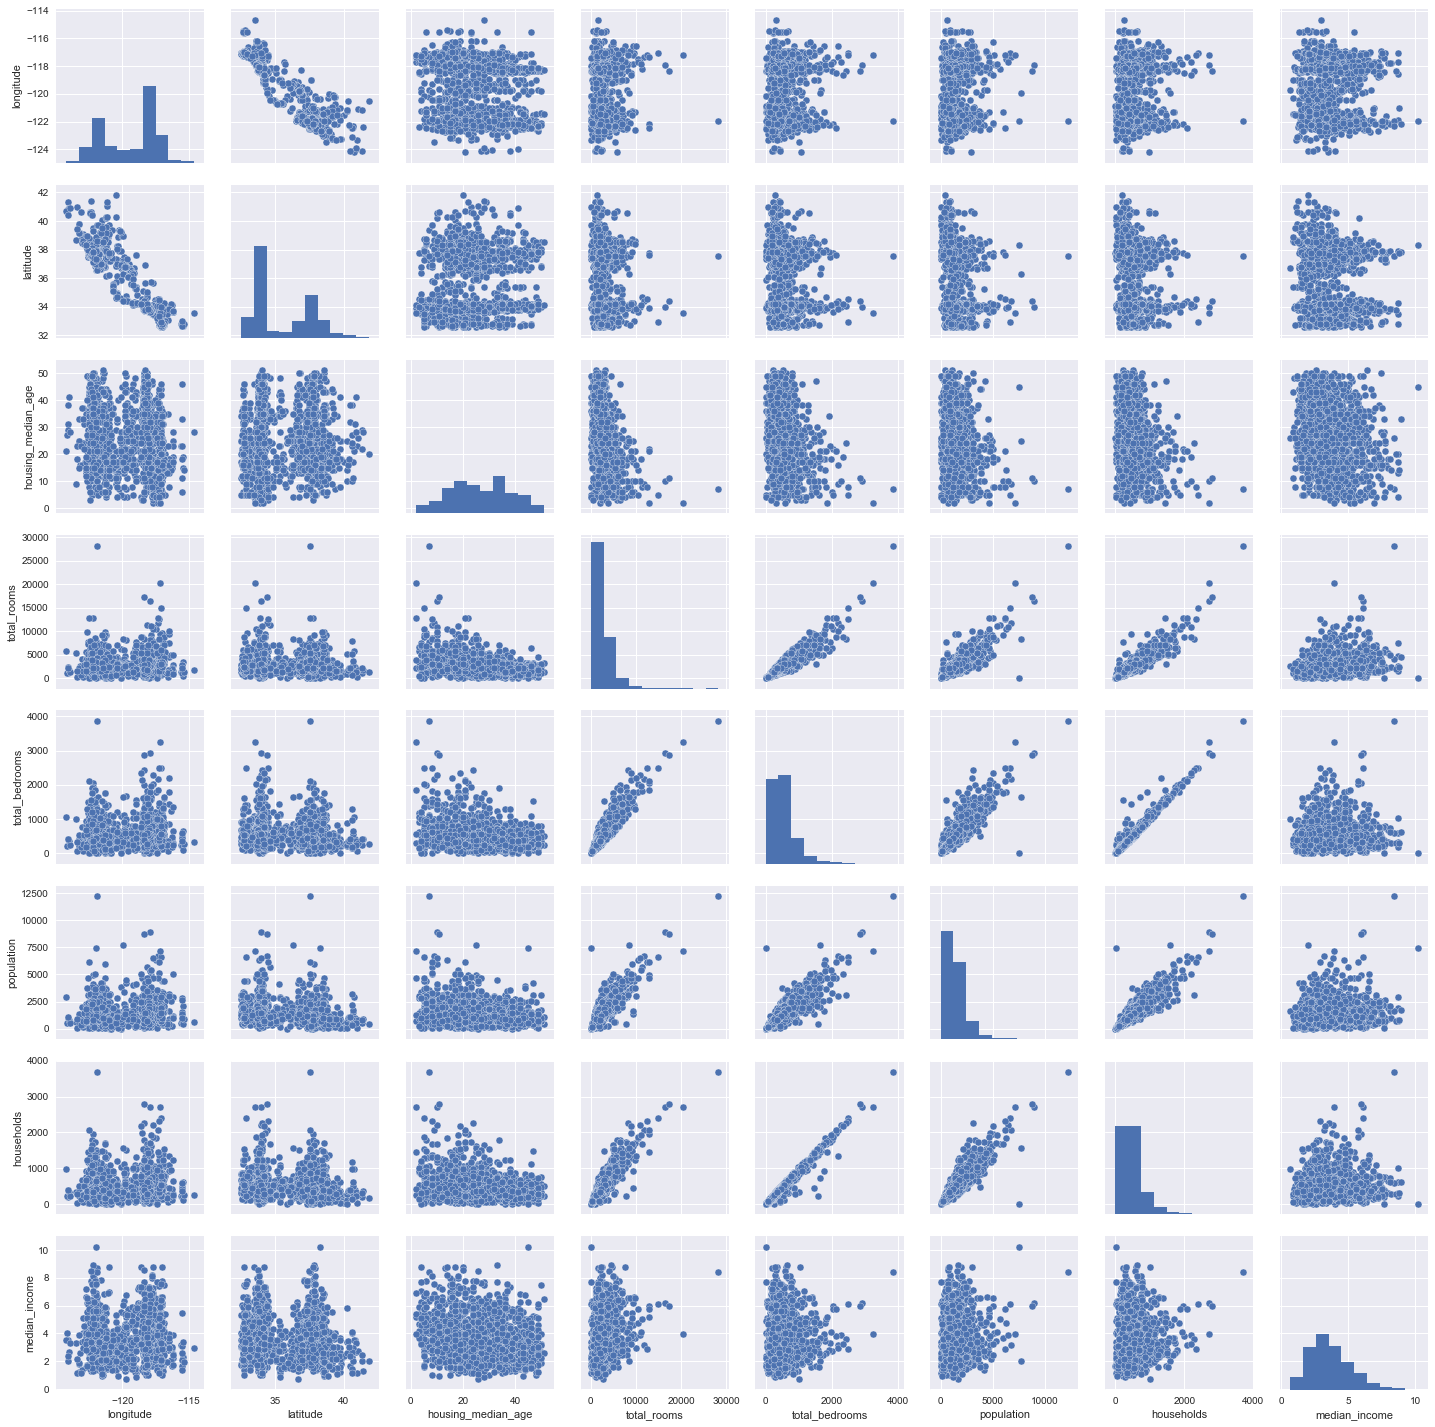

In [21]:
""" 
this function will create a grid of Axes such that each variable in data will 
by shared in the y-axis across a single row and in the x-axis across a single 
column. The diagonal Axes are treated differently, drawing a plot to show the
univariate distribution of the data for the variable in that column. 
"""
sns.pairplot(random_sample.iloc[:,0:8]);

## Multiple Linear Regression 

I attempt to select variables in order to optimize the multi-dimensional linear regression. 

### 1. First attempt

In a first step I will do a multiple linear regression for the target variable ```median_house_value``` including the following variables: ```longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income```. 

In [22]:
"""
define variables 
"""

# define variables 
X_train = data_train.iloc[:,0:8]
y_train = pd.DataFrame(data_train.iloc[:,8])
X_test = data_test.iloc[:,0:8]
y_test = pd.DataFrame(data_test.iloc[:,8])

# create linear regression object & fit a model 
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

In [23]:
# make predictions using the test dataset
y_prediction = lm.predict(X_test)

In [24]:
# return the R² score, the Mean Squared Error, the coefficients and the estimated intercept 

# R² score 
print("R² score : %.4f / 1.0000"
    % lm.score(y_test, y_prediction))

# Mean Squared Error 
print("Mean Squared Error: %.2f (smaller is better!)"
    % mean_squared_error(y_test, y_prediction))

# coefficients for the predictors
# print("Coefficients: %.4f"
#      % lm.coef_)
# This produces TypeError: only size-1 arrays can be converted to Python scalars

# predicted intercept at x=0 
print("Intercept : %.10f"
    % lm.intercept_)

ValueError: shapes (3676,1) and (8,1) not aligned: 1 (dim 1) != 8 (dim 0)

### 2. Second attempt

In a second step I will remove following variables: ```longitude, latitude, population, households, median_income```. 

I do a multiple linear regression for the target variable ```median_house_value``` including the following variables: ```housing_median_age, total_rooms, total_bedrooms```. 

In [25]:
"""
define variables 
"""

# define variables 
X_train = data_train.iloc[:,2:5]
y_train = data_train.iloc[:,8]
X_test = data_test.iloc[:,2:5]
y_test = data_test.iloc[:,8]

# create linear regression object & fit a model 
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

In [26]:
# make predictions using the test dataset
y_prediction = lm.predict(X_test)

In [27]:
# return the R² score, the Mean Squared Error, the coefficients and the estimated intercept 

# R² score 
print("R² score : %.4f / 1.0000"
    % lm.score(X_test, y_test))

# Mean Squared Error 
print("Mean Squared Error: %.2f (smaller is better!)"
    % mean_squared_error(y_test, y_prediction))

# coefficients for the predictors
# print("Coefficients: %.4f"
#      % lm.coef_)
# This produces TypeError: only size-1 arrays can be converted to Python scalars

# predicted intercept at x=0 
print("Intercept : %.10f"
    % lm.intercept_)

R² score : 0.0513 / 1.0000
Mean Squared Error: 8919366356.67 (smaller is better!)
Intercept : 154095.3232664964


### 3. Third attempt

In a third step I will only use the highest correlating variable ```median_income``` and two newly made up features (```rooms_per_household``` and ```population_per_household```) to do a multiple linear regression for the target variable ```median_house_value``` (based on 
[sonarsushant's work](https://github.com/sonarsushant/California-House-Price-Prediction/blob/master/EDA%20and%20Data%20Cleaning.ipynb)).

In [28]:
data_train['rooms_per_household']=data_train['total_rooms']/data_train['households']
data_train['bedrooms_per_room']=data_train['total_bedrooms']/data_train['total_rooms']
data_train['population_per_household']=data_train['population']/data_train['households']

In [29]:
data_test['rooms_per_household']=data_test['total_rooms']/data_test['households']
data_test['bedrooms_per_room']=data_test['total_bedrooms']/data_test['total_rooms']
data_test['population_per_household']=data_test['population']/data_test['households']

In [30]:
"""
define variables 
"""

# define variables 
X_train_series = data_train['median_income'], data_train['rooms_per_household'], \
                 data_train['population_per_household'] # independent variables
X_train = pd.concat(X_train_series, axis=1)
y_train = data_train['median_house_value'] # dependent variable

X_test_series = data_test['median_income'], data_test['rooms_per_household'], \
                 data_test['population_per_household'] # independent variables
X_test = pd.concat(X_test_series, axis=1)
y_test = data_test['median_house_value']

# create linear regression object & fit a model 
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

In [31]:
# make predictions using the test dataset
y_prediction = lm.predict(X_test)

In [32]:
# return the R² score, the Mean Squared Error, the coefficients and the estimated intercept 

# R² score 
print("R² score : %.4f / 1.0000"
    % lm.score(X_test, y_test))

# Mean Squared Error 
print("Mean Squared Error: %.2f (smaller is better!)"
    % mean_squared_error(y_test, y_prediction))

# coefficients for the predictors
# print("Coefficients: %.4f"
#      % lm.coef_)
# This produces TypeError: only size-1 arrays can be converted to Python scalars

# predicted intercept at x=0 
print("Intercept : %.10f"
    % lm.intercept_)

R² score : 0.4337 / 1.0000
Mean Squared Error: 5324521151.15 (smaller is better!)
Intercept : 55879.9488204201


--- 
## Brute-force: Multiple Linear Regression on *all combinations* of variables 

In [33]:
# create linear regression object 
lm = linear_model.LinearRegression()

In [34]:
# open an empty dictionary for the results of the calculation 
results = {}

In [35]:
""" --------------------------------------------------------------------
calc fits a linear model to a training subset, makes a prediction using 
the test subset, and returns the R² score (quality of prediction index)
-------------------------------------------------------------------- """

def calc(item): 
    # define variables 
    X_train = data_train.loc[:,features] 
    y_train = data_train.loc[:,target]
    X_test = data_test.loc[:,features] 
    y_test = data_test.loc[:,target]
    
    # fit linear model to training subset 
    model = lm.fit(X_train, y_train)
    
    # make a prediction using the test subset
    y_prediction = lm.predict(X_test)
    
    # return the R² score 
    return r2_score(y_test, y_prediction)

In [36]:
""" --------------------------------------------------------------------
define independent variables and target variable
-------------------------------------------------------------------- """

features = ["longitude", "latitude", "housing_median_age", \
            "total_rooms", "total_bedrooms", "population", \
            "households", "median_income"]
target = ["median_house_value"]

combinations = []

for i in range(2, len(features)+1):
   combinations += itertools.combinations(features, i)

In [37]:
len(combinations)

247

In [38]:
for index, features in enumerate(combinations):
    print(index, features, calc(combinations[index]))

0 ('longitude', 'latitude') 0.2675142853655378
1 ('longitude', 'housing_median_age') 0.0003843241902227179
2 ('longitude', 'total_rooms') 0.012681064320332558
3 ('longitude', 'total_bedrooms') 0.0015548891235491746
4 ('longitude', 'population') -0.0019176421500162188
5 ('longitude', 'households') 0.0033391001705973533
6 ('longitude', 'median_income') 0.4217275353052885
7 ('latitude', 'housing_median_age') 0.024041004141290845
8 ('latitude', 'total_rooms') 0.03591988375463495
9 ('latitude', 'total_bedrooms') 0.024826375354610186
10 ('latitude', 'population') 0.023390474203204614
11 ('latitude', 'households') 0.026316437102783752
12 ('latitude', 'median_income') 0.43551855127062544
13 ('housing_median_age', 'total_rooms') 0.01957702593064614
14 ('housing_median_age', 'total_bedrooms') 0.0034292467395503623
15 ('housing_median_age', 'population') -0.002084852881989674
16 ('housing_median_age', 'households') 0.005779036939385862
17 ('housing_median_age', 'median_income') 0.4502553076370301

119 ('latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms') 0.08040185178887005
120 ('latitude', 'housing_median_age', 'total_rooms', 'population') 0.09666942737608697
121 ('latitude', 'housing_median_age', 'total_rooms', 'households') 0.06018876125767891
122 ('latitude', 'housing_median_age', 'total_rooms', 'median_income') 0.4640926906179337
123 ('latitude', 'housing_median_age', 'total_bedrooms', 'population') 0.04333843272567672
124 ('latitude', 'housing_median_age', 'total_bedrooms', 'households') 0.03366057052721061
125 ('latitude', 'housing_median_age', 'total_bedrooms', 'median_income') 0.4727372009813252
126 ('latitude', 'housing_median_age', 'population', 'households') 0.05925294922822233
127 ('latitude', 'housing_median_age', 'population', 'median_income') 0.46196954634289833
128 ('latitude', 'housing_median_age', 'households', 'median_income') 0.47188296038655475
129 ('latitude', 'total_rooms', 'total_bedrooms', 'population') 0.09892620185202883
130 ('latitude',

227 ('longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'households', 'median_income') 0.4957026611513552
228 ('longitude', 'housing_median_age', 'total_rooms', 'population', 'households', 'median_income') 0.4963369663047391
229 ('longitude', 'housing_median_age', 'total_bedrooms', 'population', 'households', 'median_income') 0.4809502180599947
230 ('longitude', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income') 0.4720557829768376
231 ('latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households') 0.13682630673583895
232 ('latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'median_income') 0.5110448073239853
233 ('latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'households', 'median_income') 0.5003589807180007
234 ('latitude', 'housing_median_age', 'total_rooms', 'population', 'households', 'median_income') 0.5059164517556876
235 ('latitude', 'housing_median_age', 

In [62]:
results_df = pd.read_csv("data/results.csv", sep=",") 

In [63]:
results_df

,r2_score,index,features,no_of_features
0,0.598198,239,longitude+latitude+housing_median_age+total_ro...,7
1,0.596301,246,longitude+latitude+housing_median_age+total_ro...,8
2,0.592974,217,longitude+latitude+housing_median_age+total_be...,6
3,0.591154,242,longitude+latitude+housing_median_age+total_be...,7
4,0.589294,221,longitude+latitude+total_rooms+total_bedrooms+...,6
5,0.588351,241,longitude+latitude+housing_median_age+total_ro...,7
6,0.587569,219,longitude+latitude+housing_median_age+populati...,6
7,0.587300,243,longitude+latitude+total_rooms+total_bedrooms+...,7
8,0.586425,240,longitude+latitude+housing_median_age+total_ro...,7
9,0.583546,171,longitude+latitude+total_bedrooms+population+m...,5


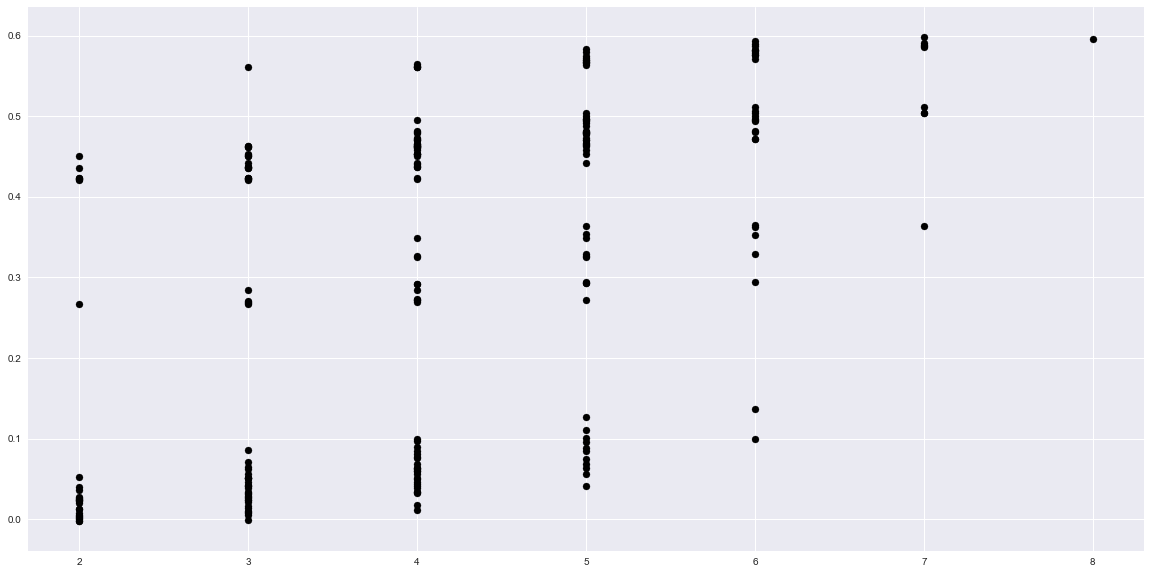

In [64]:
# Plot outputs
plt.figure(figsize=(20,10))
plt.scatter(results_df["no_of_features"], results_df["r2_score"], color='black')

plt.show();